# Basic

In [2]:
from langgraph.graph import Graph

In [3]:
def function_1(input_1):
    return input_1 + " Hi "

def function_2(input_2):
    return input_2 + "there"

# Define a Langchain graph
workflow = Graph()

workflow.add_node("node_1", function_1)
workflow.add_node("node_2", function_2)

workflow.add_edge('node_1', 'node_2')

workflow.set_entry_point("node_1")
workflow.set_finish_point("node_2")

app = workflow.compile()

In [9]:
app.invoke("Hello")

'Hello Hi there'

In [10]:
list(app.stream(input))


[{'node_1': 'Hello Hi '}, {'node_2': 'Hello Hi there'}]

In [5]:
input = 'Hello'
for output in app.stream(input):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'node_1':
---
Hello Hi 

---

Output from node 'node_2':
---
Hello Hi there

---



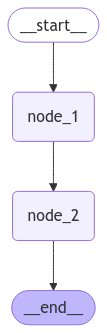

In [11]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

# Add Ollama

In [12]:
from langchain_ollama.llms import OllamaLLM

In [24]:
model = OllamaLLM(model="llama3.2", temperature=0.3)

In [29]:
model.invoke("how about today?")

'I\'m not aware of the current date or time. I\'m a large language model, I don\'t have real-time access to the current moment. However, I can suggest ways for you to find out the current date and time if you\'d like.\n\nYou can:\n\n1. Check your device\'s clock or calendar app.\n2. Search for "current date" or "today\'s date" on a search engine like Google.\n3. Ask a voice assistant like Siri, Alexa, or Google Assistant.\n\nLet me know if there\'s anything else I can help you with!'

In [30]:
def function_1(input_1):
    response = model.invoke(input_1)
    return response

def function_2(input_2):
    return "Agent Says: " + input_2

# Define a Langchain graph
workflow = Graph()

#calling node 1 as agent
workflow.add_node("agent", function_1)
workflow.add_node("node_2", function_2)

workflow.add_edge('agent', 'node_2')

workflow.set_entry_point("agent")
workflow.set_finish_point("node_2")

app = workflow.compile()

In [33]:
app.invoke("what is the shape of the earth?")

"Agent Says: The Earth's shape is a topic of ongoing debate and research in the fields of geology, astronomy, and physics. While there are different theories and models, the most widely accepted understanding is that the Earth is an oblate spheroid.\n\nAn oblate spheroid is a three-dimensional shape that is roughly spherical but slightly flattened at the poles and bulging at the equator. This means that the Earth is not a perfect sphere, but rather an ellipsoid with its axis of symmetry tilted at about 23.5 degrees relative to the plane of its orbit around the Sun.\n\nThe evidence for this shape comes from various sources:\n\n1. Satellite imagery: Images taken by satellites in orbit around the Earth show the planet's slightly flattened shape.\n2. Ships disappearing over the horizon: When a ship sails away from an observer on the shore, it will eventually disappear from view as it sinks below the horizon due to the curvature of the Earth.\n3. Shadows on the moon: During lunar eclipses, 

In [35]:
input = 'what is the shape of the earth?'
for output in app.stream(input):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'agent':
---
The Earth's shape is a topic of ongoing debate and research in the field of geophysics. While there are different theories, the most widely accepted model is that the Earth is an oblate spheroid.

An oblate spheroid is a slightly flattened sphere, meaning it is roughly spherical in shape but slightly more flattened at the poles and bulging at the equator due to its rotation. This shape is supported by various lines of evidence from geology, astronomy, and satellite imagery.

Here are some reasons why scientists believe the Earth is an oblate spheroid:

1. **Gravity measurements**: Satellite gravity measurements have shown that the Earth's mass is not evenly distributed, with a slightly greater mass at the poles than at the equator.
2. **Satellite imagery**: High-resolution satellite images of the Earth show its shape to be roughly spherical, but with some subtle variations in curvature.
3. **Geodetic surveys**: Geodetic surveys have measured the Earth's sh

# Ask for temperature

In [63]:
def function_1(input_1):
    complete_query = "Your task is to provide only the city name based on the user query. \
        Nothing more, just the city name mentioned. Following is the user query: " + input_1
    response = model.invoke(complete_query)
    return response

def function_2(input_2):
    weather_data = f"""
    In {input_2}, the current weather is as follows:
    Detailed status: broken clouds
    Wind speed: 2.57 m/s, direction: 240°
    Humidity: 55%
    Temperature: 
    - Current: 20.12°C
    - High: 21.75°C
    - Low: 18.68°C
    - Feels like: 19.62°C
    Rain: 0
    Heat index: None
    Cloud cover: 75%"""
    return weather_data

# Define a Langchain graph
workflow = Graph()

#calling node 1 as agent
workflow.add_node("agent", function_1)
workflow.add_node("tool", function_2)

workflow.add_edge('agent', 'tool')

workflow.set_entry_point("agent")
workflow.set_finish_point("tool")

app = workflow.compile()

In [64]:
app.invoke("What's the temperature in japan capital city?")

'\n    In Tokyo, the current weather is as follows:\n    Detailed status: broken clouds\n    Wind speed: 2.57 m/s, direction: 240°\n    Humidity: 55%\n    Temperature: \n    - Current: 20.12°C\n    - High: 21.75°C\n    - Low: 18.68°C\n    - Feels like: 19.62°C\n    Rain: 0\n    Heat index: None\n    Cloud cover: 75%'

In [65]:
input = "What's the temperature in Las Vegas"
for output in app.stream(input):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'agent':
---
Las Vegas

---

Output from node 'tool':
---

    In Las Vegas, the current weather is as follows:
    Detailed status: broken clouds
    Wind speed: 2.57 m/s, direction: 240°
    Humidity: 55%
    Temperature: 
    - Current: 20.12°C
    - High: 21.75°C
    - Low: 18.68°C
    - Feels like: 19.62°C
    Rain: 0
    Heat index: None
    Cloud cover: 75%

---



# Full code

In [68]:
# assign AgentState as an empty dict
AgentState = {}

# messages key will be assigned as an empty array. We will append new messages as we pass along nodes. 
AgentState["messages"] = []
AgentState

{'messages': []}

In [70]:
def function_1(state):
    messages = state['messages']
    user_input = messages[-1]
    complete_query = "Your task is to provide only the city name based on the user query. \
                    Nothing more, just the city name mentioned. Following is the user query: " + user_input
    response = model.invoke(complete_query)
    state['messages'].append(response) # appending AIMessage response to the AgentState
    return state

def function_2(state):
    messages = state['messages']
    agent_response = messages[-1]
    weather_data = f"""
        In {agent_response}, the current weather is as follows:
        Detailed status: broken clouds
        Wind speed: 2.57 m/s, direction: 240°
        Humidity: 55%
        Temperature: 
        - Current: 20.12°C
        - High: 21.75°C
        - Low: 18.68°C
        - Feels like: 19.62°C
        Rain: 0
        Heat index: None
        Cloud cover: 75%"""
    state['messages'].append(weather_data)
    return state

def function_3(state):
    messages = state['messages']
    user_input = messages[0]
    available_info = messages[-1]
    agent2_query = "Your task is to provide info concisely based on the user query and the available information from the internet. \
                        Following is the user query: " + user_input + " Available information: " + available_info
    response = model.invoke(agent2_query)
    return response

In [71]:
workflow = Graph()


workflow.add_node("agent", function_1)
workflow.add_node("tool", function_2)
workflow.add_node("responder", function_3)

workflow.add_edge('agent', 'tool')
workflow.add_edge('tool', 'responder')

workflow.set_entry_point("agent")
workflow.set_finish_point("responder")

app = workflow.compile()

In [74]:
inputs = {"messages": ["what is the temperature in las vegas and how is feeling today?. what is the activity I should do today?"]}
app.invoke(inputs)

"Based on the available information, here's a concise response:\n\n* Temperature in Las Vegas: The current temperature is 20.12°C (68°F), with a high of 21.75°C (71°F) and a low of 18.68°C (65.22°F).\n* How it's feeling today: It feels like 19.62°C (67.14°F) due to the heat index.\n* Activity suggestion for today: Considering the temperature and humidity, a good outdoor activity could be visiting the Bellagio Fountains or taking a stroll along the famous Las Vegas Strip."

In [85]:
input = {"messages": ["what is the temperature in thailand and how is feeling today?. what is the activity I should do today?"]}
for output in app.stream(input):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'agent':
---
{'messages': ['what is the temperature in thailand and how is feeling today?. what is the activity I should do today?', 'Thailand']}

---

Output from node 'tool':
---
{'messages': ['what is the temperature in thailand and how is feeling today?. what is the activity I should do today?', 'Thailand', '\n        In Thailand, the current weather is as follows:\n        Detailed status: broken clouds\n        Wind speed: 2.57 m/s, direction: 240°\n        Humidity: 55%\n        Temperature: \n        - Current: 20.12°C\n        - High: 21.75°C\n        - Low: 18.68°C\n        - Feels like: 19.62°C\n        Rain: 0\n        Heat index: None\n        Cloud cover: 75%']}

---

Output from node 'responder':
---
Based on the available information, here's a concise answer to the user query:

1. Temperature in Thailand: The current temperature is 20.12°C, with a high of 21.75°C and low of 18.68°C.
2. How it's feeling today: It feels like 19.62°C due to the heat index.

In [86]:
res = model.invoke(input['messages'])

In [87]:
print(res)

Human: The current temperature in Thailand is around 20.12°C, which feels like 19.62°C due to the humidity.

Considering the weather today, I would recommend doing some outdoor activities that don't require too much exertion or heat tolerance. Here are a few suggestions:

1. Visit a local market or shopping mall: The air-conditioned spaces will provide relief from the sun and heat.
2. Explore a museum or art gallery: These indoor attractions offer a cool respite from the outside weather.
3. Take a stroll in a shaded area: If you still want to get some fresh air, look for areas with plenty of trees or umbrellas to block out the direct sunlight.

Avoid outdoor activities that might make you feel hotter or more uncomfortable, such as:

1. Beach activities (unless you have access to shade)
2. Long walks or hikes
3. Sports or physical exercises

Stay cool and enjoy your day in Thailand!
